In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy import stats 
pd.set_option('display.float_format',lambda x:'%.3f'%x)   # to avoid value that are in scientific notations 


In [2]:
property = pd.read_csv(r"C:\Users\Nikita\Downloads\ProjectonPropertyPricePrediction\Dataset\HousePrices.csv")

In [3]:
property.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
property.shape

(2073, 81)

In [5]:
property.isnull().sum()

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64

In [6]:
property.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

In [7]:

property.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
                        ...   
MoSold                   int64
YrSold                   int64
SaleType                object
SaleCondition           object
Property_Sale_Price      int64
Length: 81, dtype: object

In [8]:
property.dtypes[property.dtypes=='objects'].index

Index([], dtype='object')

In [9]:
property.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2073.000,916.132,493.015,1.000,519.000,932.000,1302.000,1820.000
Dwell_Type,2073.000,60.556,159.925,20.000,20.000,50.000,70.000,7080.000
LotFrontage,1753.000,72.056,27.987,21.000,60.000,70.000,83.000,313.000
LotArea,2073.000,10717.853,9215.982,1300.000,7620.000,9492.000,11601.000,215245.000
OverallQual,2073.000,6.233,1.517,1.000,5.000,6.000,7.000,10.000
OverallCond,2073.000,5.835,1.360,1.000,5.000,5.000,7.000,9.000
YearBuilt,2073.000,1969.446,30.223,1872.000,1950.000,1971.000,1999.000,2010.000
YearRemodAdd,2073.000,1986.617,20.433,1950.000,1970.000,1995.000,2004.000,2023.000
MasVnrArea,2059.000,101.876,179.169,0.000,0.000,0.000,161.500,1600.000
BsmtFinSF1,2073.000,437.949,448.051,0.000,0.000,381.000,708.000,5644.000


In [10]:
len(property.dtypes[property.dtypes=='object'].index)

43

In [11]:
property.dtypes[property.dtypes=='object'].index

Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:

property.dtypes[property.dtypes!='object'].index

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [13]:
property.dtypes.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
                        ...   
MoSold                   int64
YrSold                   int64
SaleType                object
SaleCondition           object
Property_Sale_Price      int64
Length: 81, dtype: object>

In [14]:
property.isnull().sum()

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64

In [15]:
def missingValues(data):
    m=data.isnull().sum()
    md=(data.isnull().sum()/ data.shape[0]*100)
    df=pd.concat([m, md], axis=1, keys=["Missing", "Percentage"])
    fg=df.sort_values(by ="Percentage", ascending=False)
    fg1=fg[fg["Percentage"]>0]
    return fg1

In [16]:
missingValues(property)

,Missing,Percentage
PoolQC,2065,99.614
MiscFeature,1993,96.141
Alley,1944,93.777
Fence,1669,80.511
FireplaceQu,988,47.660
LotFrontage,320,15.437
GarageYrBlt,113,5.451
GarageCond,113,5.451
GarageType,113,5.451
GarageFinish,113,5.451


In [17]:
property['MiscFeature'].value_counts()

Shed    74
Othr     3
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [18]:
property['MiscFeature'] = np.where(property['MiscFeature'].isnull(), 'None',property['MiscFeature'])

In [19]:
property['MiscVal_miss'] = np.where(property['MiscFeature']=='None', 1 ,0)

In [20]:
property['MiscVal_miss'].value_counts()

1    1993
0      80
Name: MiscVal_miss, dtype: int64

In [21]:
property['PoolQC']= np.where(property['PoolQC'].isnull(),0,1)

In [22]:
property['PoolQC'].value_counts()

0    2065
1       8
Name: PoolQC, dtype: int64

In [23]:
property['Alley'].value_counts()

Grvl    72
Pave    57
Name: Alley, dtype: int64

In [24]:
property.groupby(['Alley'])['Property_Sale_Price'].mean()

Alley
Grvl   119956.306
Pave   175095.947
Name: Property_Sale_Price, dtype: float64

In [25]:
property['Alley']= np.where(property['Alley'].isnull(),'None',property['Alley'])

In [26]:
property['Alley'].fillna('None',inplace=True)

In [27]:
property['Fence'].value_counts()

MnPrv    233
GdPrv     88
GdWo      69
MnWw      14
Name: Fence, dtype: int64

In [28]:
property['Fence'].fillna('None',inplace=True)

In [29]:
property['FireplaceQu'].value_counts()

Gd    530
TA    457
Fa     40
Ex     33
Po     25
Name: FireplaceQu, dtype: int64

In [30]:
property['FireplaceQu'].fillna('None',inplace=True)

In [31]:
for i in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    property[i]=property[i].fillna('None')   # replacying missing values with none 

In [32]:
for i in ('GarageYrBlt','GarageArea','GarageCars'):
    property[i]=property[i].fillna('None')  

In [33]:
def missingValues(data):
    m=data.isnull().sum()
    md=(data.isnull().sum()/ data.shape[0]*100)
    df=pd.concat([m, md], axis=1, keys=["Missing", "Percentage"])
    fg=df.sort_values(by ="Percentage", ascending=False)
    fg1=fg[fg["Percentage"]>0]
    return fg1


In [34]:
missingValues(property)

,Missing,Percentage
LotFrontage,320,15.437
BsmtExposure,61,2.943
BsmtFinType2,60,2.894
BsmtFinType1,59,2.846
BsmtQual,59,2.846
BsmtCond,59,2.846
MasVnrType,14,0.675
MasVnrArea,14,0.675
Electrical,1,0.048


In [35]:
property['LotFrontage'].value_counts()

60.000     181
70.000      91
80.000      89
75.000      73
50.000      72
          ... 
111.000      1
141.000      1
140.000      1
150.000      1
46.000       1
Name: LotFrontage, Length: 110, dtype: int64

In [36]:
property["LotFrontage"] = property.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [37]:
property['BsmtExposure'].value_counts()

No    1349
Av     322
Gd     181
Mn     160
Name: BsmtExposure, dtype: int64

In [38]:
property['BsmtExposure'].fillna('None',inplace=True)

In [39]:
property['BsmtFinType2'].value_counts()

Unf    1770
Rec      79
LwQ      68
BLQ      50
ALQ      24
GLQ      22
Name: BsmtFinType2, dtype: int64

In [40]:
property['BsmtFinType2'].fillna('None',inplace=True)

In [41]:
property['BsmtFinType1'].value_counts()

Unf    604
GLQ    599
ALQ    319
BLQ    210
Rec    173
LwQ    109
Name: BsmtFinType1, dtype: int64

In [42]:
property['BsmtFinType1'].fillna('None',inplace=True)

In [43]:
property['BsmtQual'].value_counts()

Gd    904
TA    891
Ex    169
Fa     50
Name: BsmtQual, dtype: int64

In [44]:
property['BsmtQual'].fillna('None',inplace=True)

In [45]:
property['BsmtCond'].value_counts()

TA    1851
Gd     100
Fa      61
Po       2
Name: BsmtCond, dtype: int64

In [46]:
property['BsmtCond'].fillna('None',inplace=True)

In [47]:
def missingValues(data):
    m=data.isnull().sum()
    md=(data.isnull().sum()/ data.shape[0]*100)
    df=pd.concat([m, md], axis=1, keys=["Missing", "Percentage"])
    fg=df.sort_values(by ="Percentage", ascending=False)
    fg1=fg[fg["Percentage"]>0]
    return fg1

In [48]:

missingValues(property)

,Missing,Percentage
MasVnrType,14,0.675
MasVnrArea,14,0.675
Electrical,1,0.048


In [49]:
property['MasVnrArea'].value_counts()

0.000      1229
108.000      12
340.000      10
106.000       9
210.000       9
           ... 
594.000       1
219.000       1
479.000       1
584.000       1
74.000        1
Name: MasVnrArea, Length: 342, dtype: int64

In [50]:
property['MasVnrArea'].fillna(0,inplace = True)

In [51]:
property['MasVnrType'].value_counts()

None       1233
BrkFace     620
Stone       186
BrkCmn       20
Name: MasVnrType, dtype: int64

In [52]:
property['MasVnrType'].fillna('None',inplace=True)

In [53]:
property['Electrical'].value_counts()

SBrkr    1901
FuseA     127
FuseF      40
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [54]:
property['Electrical'].fillna(property['Electrical'].mode()[0],inplace = True)

In [55]:
property.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.1,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99]).T #t = transpose 

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Id,2073.000,916.132,493.015,1.000,21.720,42.440,63.160,83.880,104.600,208.200,519.000,932.000,1302.000,1612.800,1716.400,1737.120,1757.840,1778.560,1799.280,1820.000
Dwell_Type,2073.000,60.556,159.925,20.000,20.000,20.000,20.000,20.000,20.000,20.000,20.000,50.000,70.000,120.000,160.000,160.000,160.000,190.000,190.000,7080.000
LotFrontage,2073.000,72.003,25.974,21.000,21.000,24.000,30.320,34.000,36.000,48.000,60.000,70.500,80.000,97.000,107.000,109.000,115.000,121.000,141.840,313.000
LotArea,2073.000,10717.853,9215.982,1300.000,1884.120,2268.000,2645.960,3182.000,3675.000,5458.400,7620.000,9492.000,11601.000,14777.200,20112.400,22986.840,26081.520,32276.440,40950.480,215245.000
OverallQual,2073.000,6.233,1.517,1.000,3.000,4.000,4.000,4.000,4.000,4.000,5.000,6.000,7.000,8.000,9.000,9.000,9.000,9.000,9.000,10.000
OverallCond,2073.000,5.835,1.360,1.000,3.000,4.000,4.000,4.000,4.000,5.000,5.000,5.000,7.000,8.000,9.000,9.000,9.000,9.000,9.000,9.000
YearBuilt,2073.000,1969.446,30.223,1872.000,1900.000,1905.440,1910.000,1914.000,1916.000,1924.000,1950.000,1971.000,1999.000,2005.000,2007.000,2007.000,2007.000,2008.000,2009.000,2010.000
YearRemodAdd,2073.000,1986.617,20.433,1950.000,1950.000,1950.000,1950.000,1950.000,1950.000,1950.000,1970.000,1995.000,2004.000,2007.000,2008.000,2009.000,2009.000,2011.560,2017.000,2023.000
MasVnrArea,2073.000,101.188,178.758,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,160.000,335.800,448.000,480.000,571.000,651.000,776.480,1600.000
BsmtFinSF1,2073.000,437.949,448.051,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,381.000,708.000,1056.000,1238.000,1300.000,1351.000,1438.240,1572.280,5644.000


In [56]:
# explained variance is eigen value 

In [57]:
property[property.dtypes[property.dtypes=="object"].index]

,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,2003.000,RFn,TA,TA,Y,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,1976.000,RFn,TA,TA,Y,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,2001.000,RFn,TA,TA,Y,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,1998.000,Unf,TA,TA,Y,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,2000.000,RFn,TA,TA,Y,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,RRNn,...,BuiltIn,1999.000,RFn,TA,TA,Y,GdPrv,None,WD,Normal
2069,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,None,None,None,None,None,N,None,None,Oth,Abnorml
2070,RL,Pave,None,Reg,Low,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,2017.000,Unf,TA,TA,P,None,None,WD,Normal
2071,RL,Pave,None,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,...,Basment,1958.000,RFn,TA,TA,Y,None,None,COD,Abnorml


In [58]:
numerical_var = property.dtypes[property.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_var))

categorical_var = property.dtypes[property.dtypes == "object"]
print("Number of Categorical features: ", len(categorical_var))

Number of Numerical features:  39
Number of Categorical features:  43


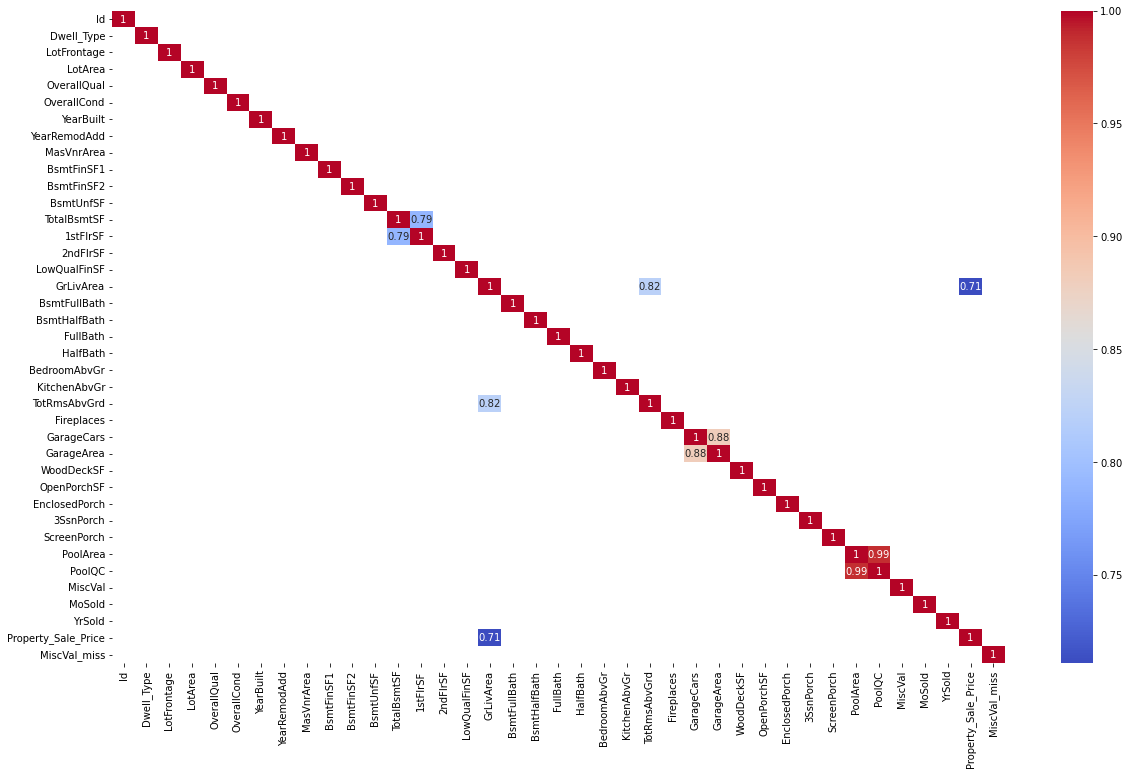

In [59]:
#filter numeric column only 

numerical_var = property.dtypes[property.dtypes != "object"].index
data_num = property[numerical_var]

categorical_var = property.dtypes[property.dtypes == "object"].index
data_cat = property[categorical_var]

#calculating correlation among numeric variable 
corr_matrix = data_num.corr() 
#filter correlation values above 0.5
filter_corr = corr_matrix[corr_matrix > 0.7]
#plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(filter_corr,
            cmap='coolwarm',
            annot=True);

Based on the above correlation matrix, correlation among the variables been observed. For example, "SalePrice" are correlated with "OverallQual" , "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", and "GarageArea".

It also show the multicollinearity. For example: the correlation between GarageCars and GarageArea is very high (0.88)

<AxesSubplot:xlabel='Property_Sale_Price', ylabel='Density'>

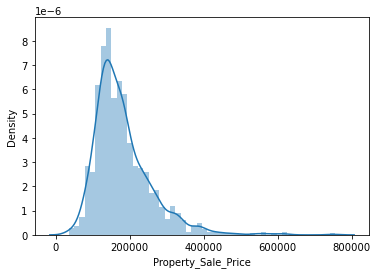

In [60]:
sns.distplot(property['Property_Sale_Price']) 

In [61]:
from scipy.stats import shapiro
shapiro(property['Property_Sale_Price'])

ShapiroResult(statistic=0.8739097714424133, pvalue=5.03303528652466e-38)

In [62]:
# box cox method   
from scipy.stats import boxcox
value, lambbda=boxcox(property['Property_Sale_Price'])

In [63]:
lambbda

-0.04375006731002627

<AxesSubplot:ylabel='Density'>

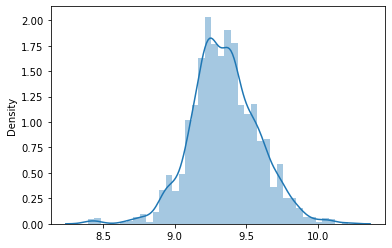

In [64]:
sns.distplot(value)

In [65]:
shapiro(value)

ShapiroResult(statistic=0.9901770353317261, pvalue=1.171950869682803e-10)

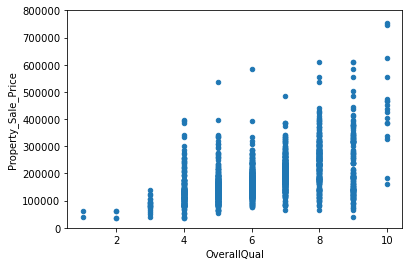

In [66]:
#scatter plot OverallQual/saleprice
data = pd.concat([property["Property_Sale_Price"], property["OverallQual"]],axis=1)
data.plot.scatter(x="OverallQual", y="Property_Sale_Price", ylim=(0,800000));

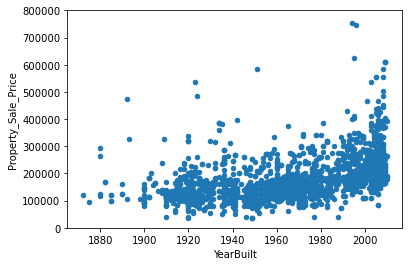

In [67]:
data = pd.concat([property["Property_Sale_Price"], property["YearBuilt"]],axis=1)
data.plot.scatter(x="YearBuilt", y="Property_Sale_Price", ylim=(0,800000));


From the above plot, we can observe that the price of a house is comparatively more than the
house was built recently. We also can notice that there are some outlier which means even if the 
house is too old, the price of the
house is moderately high due to influences of other variables.

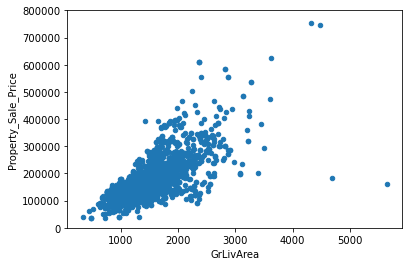

In [68]:
#scatter plot grlivarea/saleprice
data = pd.concat([property["Property_Sale_Price"], property["GrLivArea"]],axis=1)
data.plot.scatter(x="GrLivArea", y="Property_Sale_Price", ylim=(0,800000));

While the size of the ground living area is increasing, the price of the houses is increasing. But
even if the ground living area is high, the price of the house is low and when the ground living area is high, the price of the house is too high. Why?. 

We know the influence of other variables affects the price change of house.

When "GrLivArea" of a house is highly correlated with other variables, the price of the house is increasing and when "GrLivArea" of a house is not highly correlated with other variables, the price of the house is decreasing.

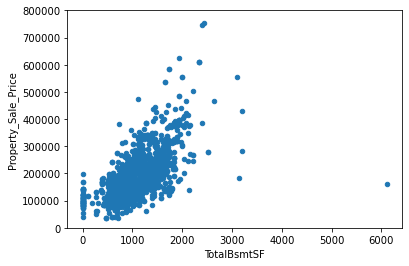

In [69]:
data = pd.concat([property["Property_Sale_Price"],property["TotalBsmtSF"]], axis=1)
data.plot.scatter(x="TotalBsmtSF", y="Property_Sale_Price", ylim=(0,800000));

We can notice that "SalePrice" and "TotalBsmtSF" is with a linear relationship. We can see the value of "SalePrice" is going straight when the value of "TotalBsmtSF" is 0. Total square feet of basement area of a house is high but the price of the house is low due to the influence of other variables

## Visualizing categorical variables with "SalePrice".
House Style¶

<AxesSubplot:title={'center':'Property_Sale_Price'}, xlabel='HouseStyle'>

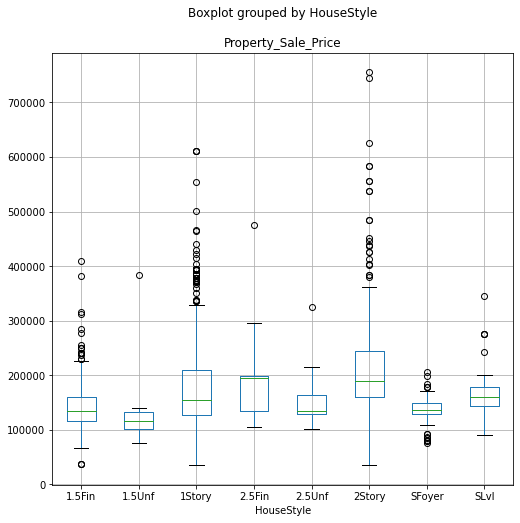

In [70]:
property.boxplot(column="Property_Sale_Price",        # Column to plot
                 by= "HouseStyle",         # Column to split upon
                 figsize= (8,8))

<AxesSubplot:title={'center':'Property_Sale_Price'}, xlabel='Foundation'>

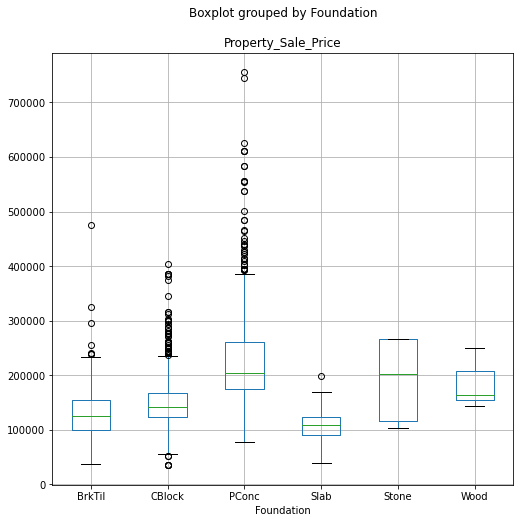

In [71]:
property.boxplot(column="Property_Sale_Price",        # Column to plot
                 by= "Foundation",         # Column to split upon
                 figsize= (8,8))


From the above plot, we can observe that if a house has "Poured Concrete" foundation, the price of the house is higher than other house prices.

<AxesSubplot:title={'center':'Property_Sale_Price'}, xlabel='GarageQual'>

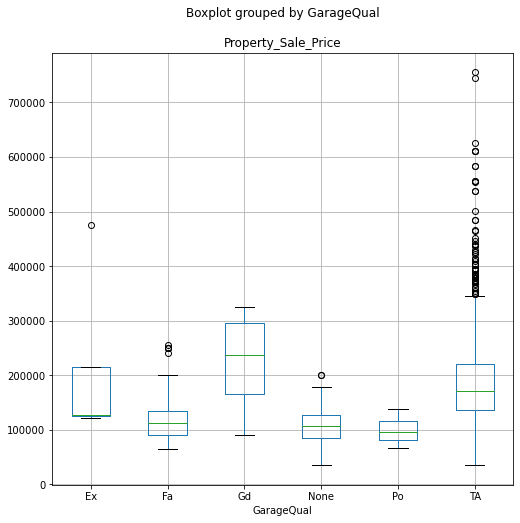

In [72]:
property.boxplot(column="Property_Sale_Price",        # Column to plot
                 by= "GarageQual",         # Column to split upon
                 figsize= (8,8))

From the above plot, we can observe that if a house has a good garage, the price of the house is higher than other house prices. Some houses have an excellent garage. So the price of this kind of house is higher than all.

So far, we have compared some variables with the target variable. We observed that what is the variables impact on target variable based EDA. If we want to reduce dimension, we can take only impact variables. This is one kind of way. Now we will use PCA to reduce the dimension of this dataset.

In [76]:
#Changing OverallCond into a categorical variable
property['OverallCond'] = property['OverallCond'].astype(str)
#MSSubClass=The building class
#property['MSSubClass'] = property['MSSubClass'].apply(str)
#Year and month sold are transformed into categorical features.
property['YrSold'] = property['YrSold'].astype(str)
property['MoSold'] = property['MoSold'].astype(str)

In [77]:
property.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

In [78]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotArea', 'PavedDrive', 'Road_Type', 'Alley', 'CentralAir', 'OverallCond', 
        'YrSold', 'MoSold')

In [79]:
for c in cols:
    label_ec = LabelEncoder() 
    label_ec.fit(list(property[c].values)) 
    property[c] = label_ec.transform(list(property[c].values))


In [80]:
property = pd.get_dummies(property, drop_first=False)
print(property.shape)

(2073, 330)


In [81]:
X =property.drop('Property_Sale_Price',axis=1)  
y=property["Property_Sale_Price"]

In [82]:
X

,Id,Dwell_Type,LotFrontage,LotArea,Road_Type,Alley,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.000,419,1,1,0,7,4,2003,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.000,638,1,1,0,6,7,1976,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.000,908,1,1,0,7,4,2001,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.000,628,1,1,0,7,4,1915,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.000,1166,1,1,0,8,4,2000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,70.500,471,1,1,0,8,3,1936,...,0,0,0,1,0,0,0,0,1,0
2069,943,90,63.000,312,1,1,0,6,8,1936,...,0,0,1,0,1,0,0,0,0,0
2070,944,90,313.000,1301,1,1,0,4,5,1983,...,0,0,0,1,0,0,0,0,1,0
2071,945,20,52.000,1170,1,1,0,9,5,1958,...,0,0,0,0,1,0,0,0,0,0


In [83]:
from sklearn.preprocessing import StandardScaler  
import numpy as np

# standardized the dataset
sc_x = StandardScaler()  
sc_x_fit=sc_x.fit(X)
X_std = sc_x_fit.transform(X)


In [84]:
X_std1=pd.DataFrame(X_std, columns=X.columns)

In [85]:
X_std1

,Id,Dwell_Type,LotFrontage,LotArea,Road_Type,Alley,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.857,-0.003,-0.270,-0.558,0.070,0.029,-0.232,0.505,-0.614,1.111,...,-0.049,-0.300,-0.049,0.392,-0.284,-0.049,-0.096,-0.108,0.472,-0.304
1,-1.855,-0.254,0.308,0.010,0.070,0.029,-0.232,-0.154,1.592,0.217,...,-0.049,-0.300,-0.049,0.392,-0.284,-0.049,-0.096,-0.108,0.472,-0.304
2,-1.853,-0.003,-0.154,0.712,0.070,0.029,-0.232,0.505,-0.614,1.044,...,-0.049,-0.300,-0.049,0.392,-0.284,-0.049,-0.096,-0.108,0.472,-0.304
3,-1.851,0.059,-0.462,-0.016,0.070,0.029,-0.232,0.505,-0.614,-1.802,...,-0.049,-0.300,-0.049,0.392,3.518,-0.049,-0.096,-0.108,-2.118,-0.304
4,-1.849,-0.003,0.462,1.382,0.070,0.029,-0.232,1.165,-0.614,1.011,...,-0.049,-0.300,-0.049,0.392,-0.284,-0.049,-0.096,-0.108,0.472,-0.304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,0.052,-0.003,-0.058,-0.423,0.070,0.029,-0.232,1.165,-1.349,-1.107,...,-0.049,-0.300,-0.049,0.392,-0.284,-0.049,-0.096,-0.108,0.472,-0.304
2069,0.055,0.184,-0.347,-0.836,0.070,0.029,-0.232,-0.154,2.327,-1.107,...,-0.049,-0.300,20.337,-2.552,3.518,-0.049,-0.096,-0.108,-2.118,-0.304
2070,0.057,0.184,9.280,1.732,0.070,0.029,-0.232,-1.473,0.121,0.449,...,-0.049,-0.300,-0.049,0.392,-0.284,-0.049,-0.096,-0.108,0.472,-0.304
2071,0.059,-0.254,-0.770,1.392,0.070,0.029,-0.232,1.824,0.121,-0.379,...,-0.049,-0.300,-0.049,-2.552,3.518,-0.049,-0.096,-0.108,-2.118,-0.304


In [86]:
from sklearn.decomposition import PCA

# create instance for pca
sklearn_pca = PCA()
# fit and transform the instance on datad
sklearn_pca_fit=sklearn_pca.fit(X_std1)
pca_result=sklearn_pca_fit.transform(X_std1)

In [87]:
pca_result

array([[ 3.14829080e+00, -1.21427577e+00, -4.32847751e-01, ...,
         9.05622394e-16,  1.05389354e-15,  3.04013572e-16],
       [-5.20608230e-01,  2.98597627e+00, -7.05915465e-01, ...,
         8.77866818e-16, -1.83268633e-15, -5.42531484e-16],
       [ 3.76799125e+00, -5.14768208e-01,  1.43586037e-01, ...,
         1.29420045e-15, -8.33485606e-16, -5.00898121e-16],
       ...,
       [-3.02886037e-01,  3.17337280e+00,  2.15751493e+00, ...,
         1.03052248e-15, -2.20391715e-15, -1.20172640e-15],
       [-7.05233127e-01,  5.17014177e+00,  1.23222295e+00, ...,
        -1.35613176e-15,  3.11517871e-15,  2.20746845e-16],
       [-2.94752617e+00, -1.92172349e+00,  1.33221152e+00, ...,
         9.61133545e-16, -4.24090866e-16,  2.76257997e-16]])

In [88]:
pd.DataFrame(pca_result)

,0,1,2,3,4,5,6,7,8,9,...,319,320,321,322,323,324,325,326,327,328
0,3.148,-1.214,-0.433,-2.929,-0.008,-1.488,0.033,-0.361,0.082,-0.774,...,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000
1,-0.521,2.986,-0.706,-0.305,0.373,0.831,0.774,-1.087,0.740,-0.121,...,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000
2,3.768,-0.515,0.144,-3.050,-0.386,-2.088,0.798,0.020,0.167,-0.682,...,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000
3,-1.766,-1.312,2.663,0.172,-1.625,0.022,0.277,-1.659,-0.113,1.438,...,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
4,5.608,-0.034,2.741,-3.406,0.083,-1.250,0.343,-0.628,-0.491,-0.373,...,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,3.369,-0.930,2.279,-3.744,0.053,-0.770,1.277,0.489,0.378,1.174,...,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000
2069,-3.042,-1.307,-1.156,3.528,6.829,-0.010,2.077,4.521,-4.263,-1.998,...,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000
2070,-0.303,3.173,2.158,2.460,3.581,-1.544,-1.408,2.813,2.360,-0.331,...,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000
2071,-0.705,5.170,1.232,3.478,-2.676,2.142,-8.361,4.759,-13.028,16.925,...,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000


In [89]:
pd.DataFrame(pca_result, columns=['Pc1', 'Pc2', 'Pc3', 'Pc4', 'Pc5', 'Pc6', 'Pc7', 'Pc8', 'Pc9', 'Pc10', 'Pc11', 'Pc12', 'Pc13', 'Pc14', 'Pc15', 'Pc16', 'Pc17', 'Pc18', 'Pc19', 'Pc20', 'Pc21', 'Pc22', 'Pc23', 'Pc24', 'Pc25', 'Pc26', 'Pc27', 'Pc28', 'Pc29', 'Pc30', 'Pc31', 'Pc32', 'Pc33', 'Pc34', 'Pc35', 'Pc36', 'Pc37', 'Pc38', 'Pc39', 'Pc40', 'Pc41', 'Pc42', 'Pc43', 'Pc44', 'Pc45', 'Pc46', 'Pc47', 'Pc48', 'Pc49', 'Pc50', 'Pc51', 'Pc52', 'Pc53', 'Pc54', 'Pc55', 'Pc56', 'Pc57', 'Pc58', 'Pc59', 'Pc60', 'Pc61', 'Pc62', 'Pc63', 'Pc64', 'Pc65', 'Pc66', 'Pc67', 'Pc68', 'Pc69', 'Pc70', 'Pc71', 'Pc72', 'Pc73', 'Pc74', 'Pc75', 'Pc76', 'Pc77', 'Pc78', 'Pc79', 'Pc80', 'Pc81', 'Pc82', 'Pc83', 'Pc84', 'Pc85', 'Pc86', 'Pc87', 'Pc88', 'Pc89', 'Pc90', 'Pc91', 'Pc92', 'Pc93', 'Pc94', 'Pc95', 'Pc96', 'Pc97', 'Pc98', 'Pc99', 'Pc100', 'Pc101', 'Pc102', 'Pc103', 'Pc104', 'Pc105', 'Pc106', 'Pc107', 'Pc108', 'Pc109', 'Pc110', 'Pc111', 'Pc112', 'Pc113', 'Pc114', 'Pc115', 'Pc116', 'Pc117', 'Pc118', 'Pc119', 'Pc120', 'Pc121', 'Pc122', 'Pc123', 'Pc124', 'Pc125', 'Pc126', 'Pc127', 'Pc128', 'Pc129', 'Pc130', 'Pc131', 'Pc132', 'Pc133', 'Pc134', 'Pc135', 'Pc136', 'Pc137', 'Pc138', 'Pc139', 'Pc140', 'Pc141', 'Pc142', 'Pc143', 'Pc144', 'Pc145', 'Pc146', 'Pc147', 'Pc148', 'Pc149', 'Pc150', 'Pc151', 'Pc152', 'Pc153', 'Pc154', 'Pc155', 'Pc156', 'Pc157', 'Pc158', 'Pc159', 'Pc160', 'Pc161', 'Pc162', 'Pc163', 'Pc164', 'Pc165', 'Pc166', 'Pc167', 'Pc168', 'Pc169', 'Pc170', 'Pc171', 'Pc172', 'Pc173', 'Pc174', 'Pc175', 'Pc176', 'Pc177', 'Pc178', 'Pc179', 'Pc180', 'Pc181', 'Pc182', 'Pc183', 'Pc184', 'Pc185', 'Pc186', 'Pc187', 'Pc188', 'Pc189', 'Pc190', 'Pc191', 'Pc192', 'Pc193', 'Pc194', 'Pc195', 'Pc196', 'Pc197', 'Pc198', 'Pc199', 'Pc200', 'Pc201', 'Pc202', 'Pc203', 'Pc204', 'Pc205', 'Pc206', 'Pc207', 'Pc208', 'Pc209', 'Pc210', 'Pc211','Pc212', 'Pc213', 'Pc214', 'Pc215', 'Pc216', 'Pc217', 'Pc218', 'Pc219', 'Pc220'])

In [90]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.DataFrame(sklearn_pca_fit.explained_variance_)  # Eigen Value

,0
0,14.284
1,7.335
2,5.961
3,5.213
4,4.210
...,...
324,0.000
325,0.000
326,0.000
327,0.000


In [91]:
# var=pd.concat([pd.DataFrame(sklearn_pca_fit.explained_variance_), pd.DataFrame(sklearn_pca_fit.explained_variance_ratio_),pd.DataFrame(sklearn_pca_fit.explained_variance_ratio_).cumsum(axis=0) ], axis=1)
# var.columns=["eigen","Ratio", "Ratio_Cum"]
# var.to_csv("D:\Training\Imarticus\PGA\PGA16W\Week21\PCA.csv")

In [92]:
eigen=pd.DataFrame({"Eigen":sklearn_pca_fit.explained_variance_, 
              "Ver_explained":sklearn_pca_fit.explained_variance_ratio_,
             "Cumm_var":sklearn_pca_fit.explained_variance_ratio_.cumsum()})

In [93]:
eigen

,Eigen,Ver_explained,Cumm_var
0,14.284,0.043,0.043
1,7.335,0.022,0.066
2,5.961,0.018,0.084
3,5.213,0.016,0.100
4,4.210,0.013,0.112
...,...,...,...
324,0.000,0.000,1.000
325,0.000,0.000,1.000
326,0.000,0.000,1.000
327,0.000,0.000,1.000


In [94]:
eigen[eigen["Cumm_var"]<=.75] 

,Eigen,Ver_explained,Cumm_var
0,14.284,0.043,0.043
1,7.335,0.022,0.066
2,5.961,0.018,0.084
3,5.213,0.016,0.100
4,4.210,0.013,0.112
...,...,...,...
133,0.989,0.003,0.737
134,0.984,0.003,0.740
135,0.983,0.003,0.742
136,0.977,0.003,0.745


In [95]:
eigen[eigen["Eigen"]>=1]

,Eigen,Ver_explained,Cumm_var
0,14.284,0.043,0.043
1,7.335,0.022,0.066
2,5.961,0.018,0.084
3,5.213,0.016,0.100
4,4.210,0.013,0.112
...,...,...,...
125,1.015,0.003,0.712
126,1.010,0.003,0.715
127,1.007,0.003,0.718
128,1.005,0.003,0.721


In [96]:
pcs81=PCA(n_components=81)
pcs81_fit=pcs81.fit(X_std1)
X_pcs=pcs81_fit.transform(X_std1)

In [97]:
pc_X=pd.DataFrame(X_pcs, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60','PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70', 'PC71','PC72','PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79','PC80','PC81'])

In [98]:
y=property["Property_Sale_Price"] 

In [99]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(pc_X, y) 

LinearRegression()

In [100]:
lr.score(pc_X, y)

0.8510012110185917

In [101]:
lr=LinearRegression()
lr.fit(X_std1, y)
lr.score(X_std1, y)

0.9249333969457398

In [102]:
X_std1.shape

(2073, 329)

In [103]:
pc_X.shape

(2073, 81)

In [104]:
# create instance for pca
sklearn_pca = PCA(81)
# fit and transform the instance on datad
X_sklearn = sklearn_pca.fit(X_std1)

In [105]:
X_sklearn.components_.T

array([[ 0.00314575, -0.00171737,  0.00121451, ..., -0.12502015,
        -0.02107859, -0.04340937],
       [ 0.00198845, -0.03667991, -0.00958993, ..., -0.00697488,
        -0.00257024, -0.03281733],
       [ 0.06718554,  0.07732798,  0.15511171, ...,  0.01190517,
         0.01258877, -0.03667596],
       ...,
       [-0.01002954,  0.00450433,  0.00778844, ..., -0.09746866,
        -0.06408459, -0.13077164],
       [-0.05220961,  0.07852718,  0.05132631, ...,  0.05558921,
        -0.00843688,  0.01965566],
       [ 0.1189874 , -0.11558554, -0.0723435 , ..., -0.00096009,
         0.01284973,  0.02589247]])

In [106]:
#variable reduction
Loadings =  pd.DataFrame((X_sklearn.components_.T * np.sqrt(X_sklearn.explained_variance_)).T,columns=X.columns).T

In [107]:
Loadings

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
Id,0.012,-0.005,0.003,-0.028,0.009,-0.019,0.005,-0.020,0.044,-0.025,...,0.005,-0.010,0.036,-0.074,-0.015,-0.065,0.035,-0.135,-0.023,-0.046
Dwell_Type,0.008,-0.099,-0.023,-0.112,0.169,0.057,0.036,-0.066,0.024,0.023,...,0.017,-0.085,0.022,0.017,-0.016,0.070,0.051,-0.008,-0.003,-0.035
LotFrontage,0.254,0.209,0.379,0.190,-0.128,-0.102,-0.044,0.122,-0.012,-0.007,...,0.009,-0.050,0.033,-0.068,0.020,0.003,-0.002,0.013,0.014,-0.039
LotArea,0.290,0.266,0.454,0.161,-0.129,-0.087,0.002,0.117,0.003,0.034,...,0.045,-0.039,0.013,0.004,0.016,-0.052,-0.018,-0.037,0.013,0.024
Road_Type,0.058,-0.035,-0.018,-0.096,-0.019,-0.129,-0.127,-0.075,-0.183,-0.122,...,0.080,-0.034,0.056,0.010,-0.021,-0.047,0.091,-0.049,0.008,-0.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.063,-0.010,0.009,0.077,0.162,-0.101,0.103,0.048,-0.115,0.045,...,-0.062,-0.012,-0.027,0.037,-0.084,-0.009,-0.002,-0.007,-0.067,0.067
SaleCondition_Alloca,-0.051,0.051,0.086,0.072,0.316,-0.033,-0.037,0.096,0.141,0.096,...,0.048,0.058,-0.129,0.018,-0.016,0.095,-0.046,0.023,-0.008,-0.005
SaleCondition_Family,-0.038,0.012,0.019,0.013,0.003,0.016,-0.083,0.002,-0.008,0.019,...,0.116,0.019,0.020,-0.047,-0.187,-0.031,-0.204,-0.105,-0.069,-0.140
SaleCondition_Normal,-0.197,0.213,0.125,-0.412,-0.116,-0.172,0.136,-0.253,0.187,-0.399,...,-0.001,-0.025,0.046,-0.022,0.051,0.032,0.016,0.060,-0.009,0.021


In [108]:
Loadings.columns= ['Pc1', 'Pc2', 'Pc3', 'Pc4', 'Pc5', 'Pc6', 'Pc7', 'Pc8', 'Pc9', 'Pc10', 'Pc11', 'Pc12', 'Pc13', 'Pc14', 'Pc15', 'Pc16', 'Pc17', 'Pc18', 'Pc19', 'Pc20', 'Pc21', 'Pc22', 'Pc23', 'Pc24', 'Pc25', 'Pc26', 'Pc27', 'Pc28', 'Pc29', 'Pc30', 'Pc31', 'Pc32', 'Pc33', 'Pc34', 'Pc35', 'Pc36', 'Pc37', 'Pc38', 'Pc39', 'Pc40', 'Pc41', 'Pc42', 'Pc43', 'Pc44', 'Pc45', 'Pc46', 'Pc47', 'Pc48', 'Pc49', 'Pc50', 'Pc51', 'Pc52', 'Pc53', 'Pc54', 'Pc55', 'Pc56', 'Pc57', 'Pc58', 'Pc59', 'Pc60', 'Pc61', 'Pc62', 'Pc63', 'Pc64', 'Pc65', 'Pc66', 'Pc67', 'Pc68', 'Pc69', 'Pc70', 'Pc71', 'Pc72', 'Pc73', 'Pc74', 'Pc75', 'Pc76', 'Pc77', 'Pc78', 'Pc79', 'Pc80', 'Pc81']

In [109]:
property.columns

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'Road_Type', 'Alley',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=330)

In [133]:
x1=X[["OverallQual", "YearBuilt", "GarageCars", "Foundation_CBlock", 
      "MSZoning_RL", "TotRmsAbvGrd","GrLivArea","MSSubClass","HouseStyle_1Story", "BldgType_Duplex"]]

KeyError: "['MSZoning_RL', 'MSSubClass', 'BldgType_Duplex'] not in index"

In [134]:
lr=LinearRegression()
lr.fit(x1, y)
lr.score(x1, y) 

NameError: name 'x1' is not defined

In [ ]:
lr.coef_